# CHAPTER 29: Linear Regression

### This code generates figure 1 from Chapter 29: Linear Regression (vol II)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Eduardo Faria Cabrera

required libraries:
    
1. numpy
2. matplotlib
3. mpl_toolkits
4. itertools

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import itertools
from matplotlib.patches import FancyArrowPatch

## Example 29.2 (Learning a regression model from data)

Assume we can estimate the price of a house  in some neighborhood $\mathbb{A}$, measured in units of $\times 1000$ USD, in some affine manner from the surface area $s$ (measured in square meters) and  the unit's age $a$ (measured in years), say, as:

$\widehat{P}=\alpha s + \beta a - \theta$

for some unknown scalar parameters $(\alpha,\beta,\theta)$. Here, the scalar $\theta$ denotes an {\em offset} parameter and the above relation represents the equation of a plane mapping values $(s,a)$ into an estimate for the house price, denoted by $\widehat{P}$.  We collect the attributes $\{s,a\}$ into an observation vector:

$y = \begin{bmatrix} s \\ a \end{bmatrix}$

and the unknown parameters $\{\alpha,\beta\}$ into a column vector:

$w= \begin{bmatrix} \alpha \\ \beta \end{bmatrix}$

Then, the mapping from $y$ to $\widehat{P}$ can be written more compactly as:

$\widehat{P}=y^\intercal w - \theta$

The price $P$ plays the role of the variable $x$ that we wish to estimate from observations of $y$. If we happen to know the first- and second-order moments of the price and observation variables, then we could estimate $(w,\theta)$ by using

$w^o=R_{y}^{-1} r_{yP},\;\;\;\;\theta^o=\bar{y}^\intercal w^o-\bar{P}$

where $\bar{P}$ is the average price of houses in neighborhood $\mathbb{A}$. Often, in practice, these statistical moments are not known beforehand. They can, however, be estimated from measurements. Assume we have available a list of $N$ houses from neighborhood $\mathbb{A}$ with their prices, sizes, and ages; obviously, the house whose price we are interested in estimating should not be part of this list. We denote the available information by $\{P_n, y_n\}$ where $n=1,2,\ldots,N$. Then, we can estimate the first- and second-order moments from this data by using the sample averages:

$\widehat{\bar{P}}=\frac{1}{N}\sum_{n=1}^{N} P_n,\;\;\;\;\;\;\;
\widehat{\bar{y}}=\frac{1}{N}\sum_{n=1}^{N} y_n$

and

$\widehat{r}_{yP}=\frac{1}{N}\sum_{n=1}^{N} (y_n-\widehat{\bar{y}}\,) (P_n-\widehat{\bar{P}}\,)\\
\widehat{R}_y=\frac{1}{N}\sum_{n=1}^{N} (y_n-\widehat{\bar{y}}\,)(y_n-\widehat{\bar{y}}\,)^\intercal $

The parameters $(w^o,\theta^o)$  would be approximated by

$w^{\star}=\widehat{R}_y^{-1} \widehat{r}_{yP}\\
\theta^{\star}=\widehat{\bar{y}}^\intercal w^{\star}-\widehat{\bar{P}}$

where we are using the star notation to refer to parameters estimated directly from data measurements; this will be a standard convention in our treatment.

True parameters: 
 alpha: 3 
 beta: -2 
 theta: 1
Estimated parameters: 
 alpha: 3.002542953502897 
 beta: -2.0449194439736864 
 theta: 0.1657047193507708


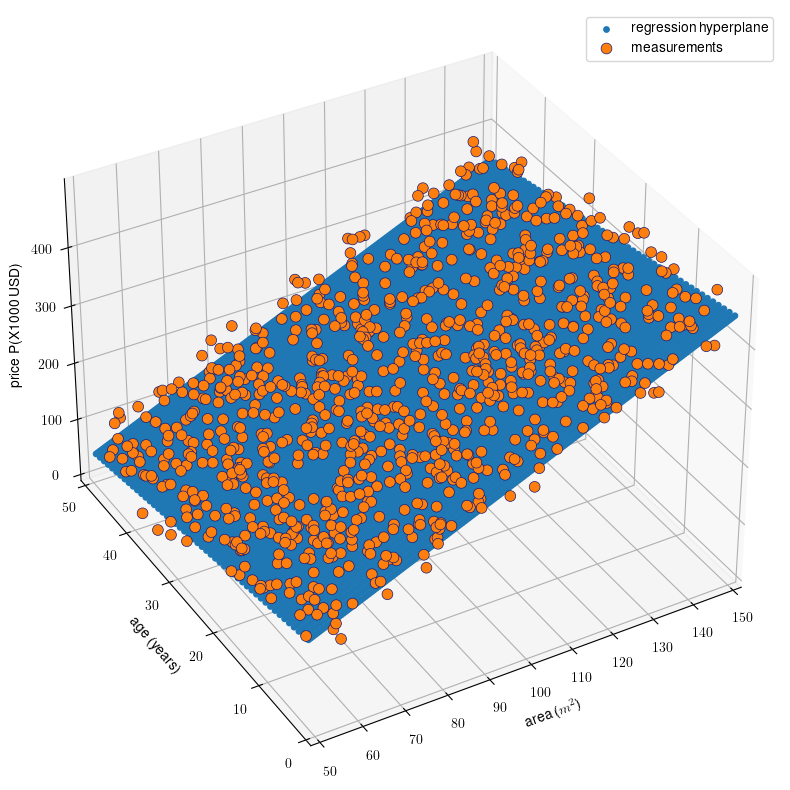

In [5]:
#Model parameters
alpha = 3 #parameter alpha set to 3K USD/m^2; (units of x1000 USD)
beta = -2 #parameter beta set to 2K USD decrease/year
theta = 1 #offset

std_noise = 100 #stanard deviation 100K USD for random fluctuations in price

AL = 50 #Lower and upper limits on area size in m^2
AU = 150 
ageU = 50 #Upper limit in years on the age of homes

#Data generation
N = 1000 #number of data points to be generated

area = np.random.uniform(AL, AU, (N, 1)) #area uniformly selected within [AL AU]
age = np.random.uniform(0, ageU, (N, 1)) + 1 #age randomly selected
P = alpha*area + beta*age - theta + std_noise*(np.random.uniform(0, 1, (N, 1)) - 0.5) 
H = np.concatenate([area, age], 1) #saving n-th feature column vector h_n

P_bar = P.mean() #mean price from data
h_bar = H.mean(axis=0) #mean feature vector

hat_R_h = H.T@H/N #estimate of R_h
hat_r_hP = H.T@P/N #estimate of r_hP

w_star = np.linalg.inv(hat_R_h)@hat_r_hP 
theta_star = h_bar.T@w_star-P_bar

h = np.array([[102, 17]]) #a feature vector   
hat_P = h@w_star - theta_star

P_low = min(P) #lowest price
P_high = max(P) #highest price

#Generate regression line
age_line = np.arange(1, ageU, 1)
area_line = np.arange(AL, AU, 0.5)
hn = np.array(list(itertools.product(area_line, age_line))) # Regression hyperplane
price_line = hn@w_star - theta_star

print(f"True parameters: \n alpha: {alpha} \n beta: {beta} \n theta: {theta}")
print(f"Estimated parameters: \n alpha: {w_star[0][0]} \n beta: {w_star[1][0]} \n theta: {theta_star[0]}")


#generating figure
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=10, 10
fig = plt.figure()

ax = fig.add_subplot(projection='3d')

ax.scatter(hn[:, 0], hn[:, 1], price_line, s=15, alpha=1, zorder=2, label="regression hyperplane") #regression hyperplane
ax.scatter(area, age, P, s=60, alpha=1, zorder=3, label="measurements", color="tab:orange", edgecolor="midnightblue", linewidth=0.5) #measurements
ax.set_xlim([50, 150])
ax.set_ylim([0, 50])
ax.invert_yaxis()
ax.invert_xaxis()
ax.zaxis.set_rotate_label(False)
ax.view_init(35, 60)
ax.set_xlabel("area ($m^2$)", fontsize=10)
ax.set_ylabel("age (years)", fontsize=10)
ax.set_zlabel("price P(X1000 USD)", fontsize=10, rotation=90)
ax.set_zticks(np.arange(0, 500, 100))
plt.xticks(np.arange(50, 160, 10))
plt.yticks(np.arange(0, 60, 10))
ax.legend()

plt.grid(alpha=0.7)
plt.show()

**Figure $28.1$** Scatter diagram of $N=500$ points $(P_n, y_n)$ representing the triplet (price, area, age) for a collection of $500$ houses. The price is measured in units of $\times 1000$ USD, the area in units of $\textit{\rm m}^2$, and the age in units of years. The spheres represent the measured data. The flat plane represents the fitted regression plane (29.48).

Figure 29.1 illustrates these results by means of a simulation. The figure shows the scatter diagram for $N=500$ points $(P_n, y_n)$ representing the triplet (price, area, age) for a collection of $500$ houses. The price is measured in units of $\times 1000$ USD, the area in units of $\textit{\rm m}^2$, and the age in units of years. The spheres represent the measured data. The flat plane represents the regression plane that results from the above calculations, namely,

$\widehat{P}=y^\intercal w^{\star}-\theta^{\star}

with

$w^{\star}= \begin{bmatrix} 3.02 \\ -2.04 \end{bmatrix}, \;\;\;\theta^{\star}=1.26$

The values of the parameters $(\alpha,\beta,\theta)$ are  measured in units of $\times 1000$ USD. Given a $17$-year old house with area  $102\, \textit{\rm m}^2$, we can use the above parameter values to
estimate/predict its price as follows:

$
\widehat{P}= (3.02\times 102) -(2.04\times 17) -1.26 = 272.1\textit{\rm K USD} 
$